# Loan Predictor

With the help of tools about which we learned in the course , we try to predict the loan price based on the individuals information like whether the individual is married or not, no. of dependents etc. based on the given dataset. The dataset is taken from the Kaggle website

In [2]:
!pip install jovian pandas --upgrade --quiet
!pip install jovian numpy --upgrade --quiet
!pip install jovian opendatasets --upgrade --quiet

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scipy 1.7.1 requires numpy<1.23.0,>=1.16.5, but you have numpy 1.23.1 which is incompatible.
numba 0.54.0 requires numpy<1.21,>=1.17, but you have numpy 1.23.1 which is incompatible.


Let's begin by downloading the data, and listing the files within the dataset.

In [3]:
# Change this
dataset_url = 'https://www.kaggle.com/datasets/altruistdelhite04/loan-prediction-problem-dataset' 

In [4]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: aakarshmittal
Your Kaggle Key: ········


100%|██████████| 12.6k/12.6k [00:00<00:00, 7.88MB/s]

The dataset has been downloaded and extracted.

In [5]:
# Change this
data_dir = './loan-prediction-problem-dataset'

In [7]:
import os
os.listdir(data_dir)

['test.csv', '.ipynb_checkpoints', 'train.csv']

Let us save and upload our work to Jovian before continuing.

In [8]:
project_name = "LOAN PREDICTOR" # change this (use lowercase letters and hyphens only)

In [9]:
!pip install jovian --upgrade -q

In [10]:
import jovian

In [11]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "aakarsh2mittal/loan-predictor" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/aakarsh2mittal/loan-predictor


'https://jovian.ai/aakarsh2mittal/loan-predictor'

## Data Preparation and Cleaning

We analyze our dataset and clean it using different operations and fill the values having NA with the appropriate values.



In [12]:
import numpy as np
import pandas as pd


In [13]:
df = pd.read_csv( data_dir +"/test.csv")

In [14]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


we make an extra column having the net income of a family

In [15]:
df['totalincome']=df['ApplicantIncome'] + df['CoapplicantIncome']

In [16]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,totalincome
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,5720
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,4576
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,6800
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,4886
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,3276
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban,5786
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban,4867
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban,5243
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural,7393


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
 12  totalincome        367 non-null    int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 37.4+ KB


In [18]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,totalincome
count,367.000000,367.000000,362.000000,361.000000,338.000000,367.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444,6375.177112
std,4910.685399,2334.232099,61.366652,65.156643,0.380150,5199.423594
min,0.000000,0.000000,28.000000,6.000000,0.000000,1760.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000,4156.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000,5205.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000,6980.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000,72529.000000


In [19]:
df['Credit_History']=df['Credit_History'].fillna(0)
df['Self_Employed']=df['Self_Employed'].fillna('No')
df['Gender']=df['Gender'].fillna('bisexual')
df['Dependents']=df['Dependents'].fillna(0)
df['LoanAmount']=df['LoanAmount'].fillna(0)
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(0)

Now we have filled all the NA values with the appropriate values using the above operations.

In [20]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,totalincome
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,5720
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,4576
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,6800
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,0.0,Urban,4886
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,3276
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban,5786
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban,4867
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,0.0,Semiurban,5243
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural,7393


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             367 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         367 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      367 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         367 non-null    float64
 9   Loan_Amount_Term   367 non-null    float64
 10  Credit_History     367 non-null    float64
 11  Property_Area      367 non-null    object 
 12  totalincome        367 non-null    int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 37.4+ KB


In [22]:
import jovian

In [23]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "aakarsh2mittal/loan-predictor" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/aakarsh2mittal/loan-predictor


'https://jovian.ai/aakarsh2mittal/loan-predictor'

## Exploratory Analysis and Visualization

Now let us try to explore our data with the help of some visuals



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [24]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

/opt/conda/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='totalincome', ylabel='LoanAmount'>

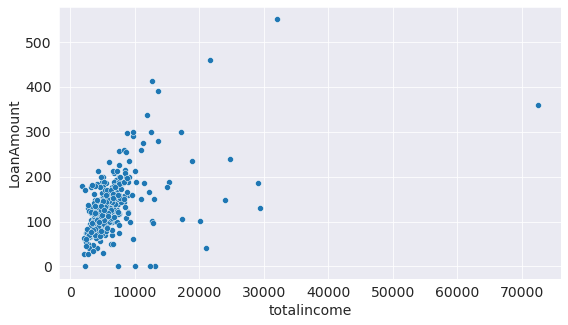

In [25]:
sns.scatterplot(df.totalincome,df.LoanAmount)

Relationship between loan amount and total income can be seen in the above graph.

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


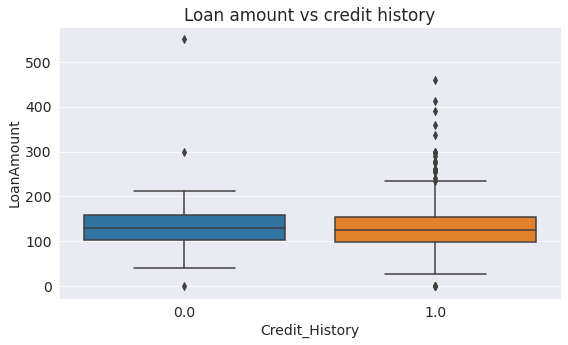

In [27]:
# Chart title
plt.title("Loan amount vs credit history")

# Draw a nested boxplot to show bills by day and time
sns.boxplot(df.Credit_History,df.LoanAmount);

Relationship between loan amount and credit history can be seen in the above graph.

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LoanAmount', ylabel='Loan_Amount_Term'>

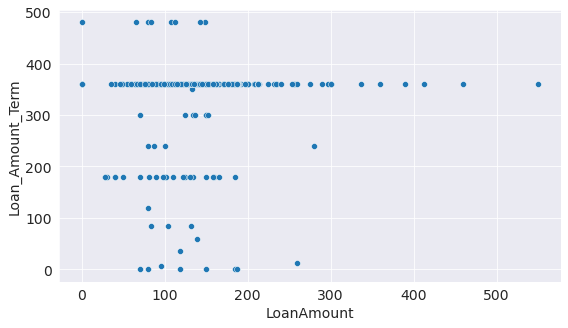

In [29]:
sns.scatterplot(df.LoanAmount,df.Loan_Amount_Term)

Relationship between loan amount and loan amount term can be seen in the above graph.

In [30]:
df['edu']=df.Education.copy()

In [31]:
for i in range(367):
    if(df.Education[i]=='Graduate'):
        df.edu[i]=1
    else:
        df.edu[i]=0

/tmp/ipykernel_39/4049268419.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.edu[i]=1
/tmp/ipykernel_39/4049268419.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.edu[i]=0


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


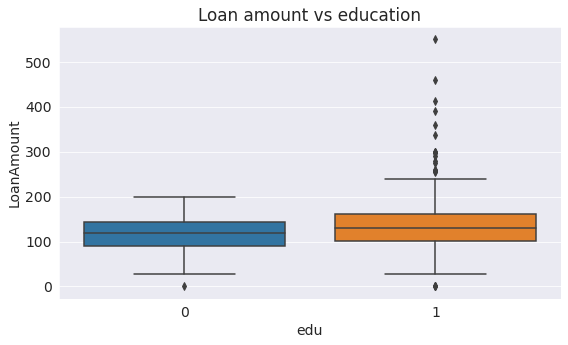

In [32]:
# Chart title
plt.title("Loan amount vs education")

# Draw a nested boxplot to show bills by day and time
sns.boxplot(df.edu,df.LoanAmount);

Relationship between loan amount and educational qualification of the person can be seen in the above graph.

In [33]:
df.dep=df.Dependents.copy()

/tmp/ipykernel_39/332708823.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.dep=df.Dependents.copy()


In [34]:
for i in range(367):
    if(df.Dependents[i]=='0'):
        df.dep[i]=0
    elif(df.Dependents[i]=='1'):
        df.dep[i]=1
    elif(df.Dependents[i]=='2'):
        df.dep[i]=2 
    elif(df.Dependents[i]=='3'):
        df.dep[i]=3      
    else:
        df.dep[i]=4

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LoanAmount', ylabel='Dependents'>

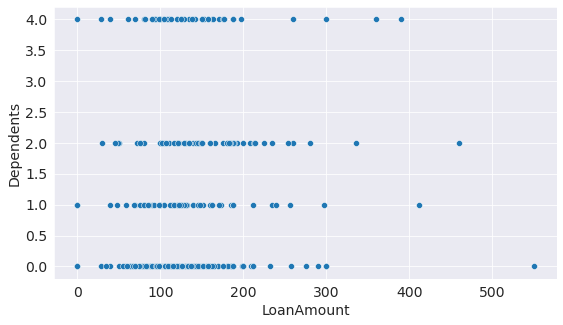

In [35]:
sns.scatterplot(df.LoanAmount,df.dep)

Relationship between loan amount and total number of dependents can be seen in the above graph.

Let us save and upload our work to Jovian before continuing

In [36]:
import jovian

In [37]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "aakarsh2mittal/loan-predictor" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/aakarsh2mittal/loan-predictor


'https://jovian.ai/aakarsh2mittal/loan-predictor'

## Asking and Answering Questions

TODO - write some explanation here.



> Instructions (delete this cell)
>
> - Ask at least 5 interesting questions about your dataset
> - Answer the questions either by computing the results using Numpy/Pandas or by plotting graphs using Matplotlib/Seaborn
> - Create new columns, merge multiple dataset and perform grouping/aggregation wherever necessary
> - Wherever you're using a library function from Pandas/Numpy/Matplotlib etc. explain briefly what it does



#### Q1:How does the loan amount varies with total income ?

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='totalincome', ylabel='LoanAmount'>

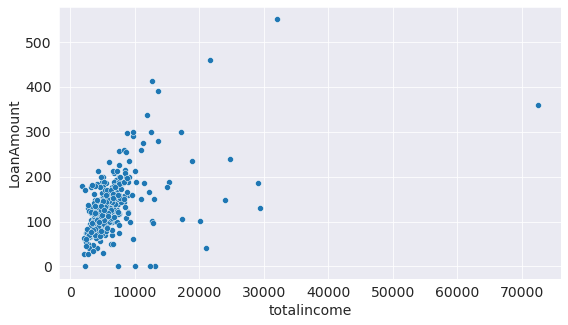

In [38]:
sns.scatterplot(df.totalincome,df.LoanAmount)

People with income less than 10000 tends to apply more for loan.

#### Q2: How does the loan amount varies with credit history ?

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


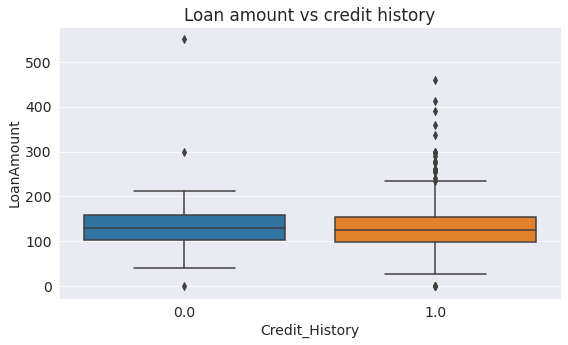

In [39]:
# Chart title
plt.title("Loan amount vs credit history")

# Draw a nested boxplot to show bills by day and time
sns.boxplot(df.Credit_History,df.LoanAmount);

People having credit score 1 tends to apply for loan more than people having score 0.

#### Q3: How does the loan amount varies with loan amount term ?

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LoanAmount', ylabel='Loan_Amount_Term'>

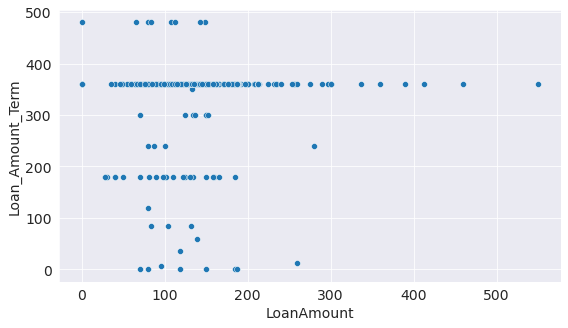

In [40]:
sns.scatterplot(df.LoanAmount,df.Loan_Amount_Term)

Higher the loan amount term , higher the tendency for applying for a loan.

#### Q4: How does the loan amount varies with the educational qualification ?

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


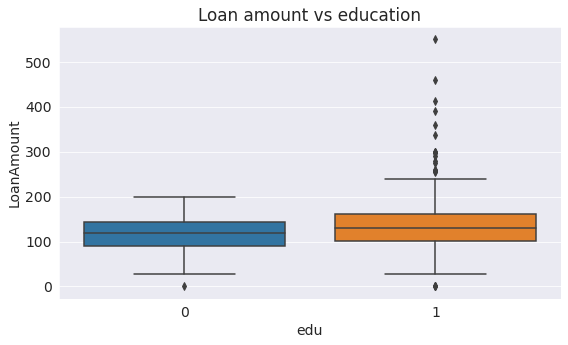

In [41]:
# Chart title
plt.title("Loan amount vs education")

# Draw a nested boxplot to show bills by day and time
sns.boxplot(df.edu,df.LoanAmount);

Graduate tends to apply more for loan than non-graduates.

#### Q5: How does the loan amount varies with the number of dependents ?

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LoanAmount', ylabel='Dependents'>

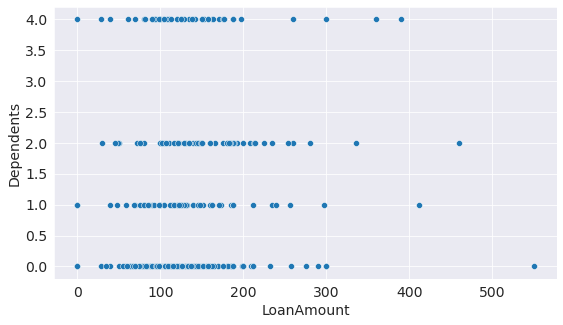

In [42]:
sns.scatterplot(df.LoanAmount,df.dep)

The loan amount varies quite uniformly with the number of dependents.  

Let us save and upload our work to Jovian before continuing.

In [43]:
import jovian

In [44]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "aakarsh2mittal/loan-predictor" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/aakarsh2mittal/loan-predictor


'https://jovian.ai/aakarsh2mittal/loan-predictor'

## Inferences and Conclusion

Loan amount varies linearly with educational qualification,total income,credit history and loan amount term.

In [45]:
import jovian

In [46]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "aakarsh2mittal/loan-predictor" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/aakarsh2mittal/loan-predictor


'https://jovian.ai/aakarsh2mittal/loan-predictor'

## References and Future Work

Using higher end models of machine learning , we can predict the loan amount in a better way.

In [47]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>